In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from skipper import observe

In [3]:
plt.rcParams['font.size']=20

sys.path.append('../scripts')

import make_pointings
import sigjson_f2021b

import datetime
import pytz

In [4]:
ctio = observe.ObservingSite ()

In [5]:
oiii_pointings = sigjson_f2021b.load_mastercat_cosmos ()
halpha_pointings = sigjson_f2021b.load_mastercat_cosmos ( '../pointings/S2021A.csv')
all_pointings = np.concatenate([oiii_pointings.index, halpha_pointings.index])

In [6]:
tele = pd.read_csv('/Users/kadofong/Downloads/tele20211130.csv')
coo = observe.CopilotOutput ('/Users/kadofong/Downloads/db_merian.fits',
                            pointings=all_pointings)
reobs = coo.flag_for_reobservation ( )

# Predict GAMA/COSMOS coverage in F2021B

In [7]:
datelist_2021b_n536 = [(2021,12,31), (2021,1,1)]
datelist_2021b_n536 += [(2021,1,ix) for ix in np.arange(3,5)]
datelist_2021b_n536 += [(2021,1,ix) for ix in np.arange(6,8)]
datelist_2021b_n536 += [(2021,1,ix) for ix in np.arange(9,12)]
datelist_2021b_n536 += [(2022,1,ix) for ix in np.arange(25, 32)]
nightslot_2021b_n536 = [2,2]
nightslot_2021b_n536 += [2 for ix in np.arange(3,5)]
nightslot_2021b_n536 += [2 for ix in np.arange(6,8)]
nightslot_2021b_n536 += [2 for ix in np.arange(9,12)]
nightslot_2021b_n536 += [2 for ix in np.arange(25,32)]
priorities_2021b_n536 = {'COSMOS':0, 'GAMA':1}  

In [8]:
fmt = sigjson_f2021b.fmt
et = sigjson_f2021b.et

In [9]:
prior_pointings = pd.DataFrame ( index=all_pointings,
                           columns=['is_queued','qstamp','has_priority'])
prior_pointings['is_queued'] = False
prior_pointings.loc[coo.merian_sidecar['object'], 'is_queued'] = True
prior_pointings.loc[reobs,'is_queued'] = False

In [10]:
prior_pointings['is_queued'].sum()

251

In [11]:
datelist = datelist_2021b_n536
nightslot_l = nightslot_2021b_n536
priorities = priorities_2021b_n536
ocat = observe.ObsCatalog(comment='--', proposer='Leathaud', 
                          propid='2020B-0288', seqid='S2021B')

f2021b_pointings = prior_pointings.reindex(oiii_pointings.index)
for ix,date in enumerate(datelist):
    year, month, day = date        
    night_start, night_end = ctio.get_sunriseset ( year, month, day )
    if nightslot_l[ix] == 0:
        print('[predict] night slot: Full night')
        obs_start = night_start
        obs_end = night_end
    elif nightslot_l[ix] == 1:
        print('[predict] night slot: First half')
        obs_start = night_start
        obs_end = obs_start + 0.5*(night_end-obs_start)
    else:
        print('[predict] night slot: Second half')
        obs_start = night_start + 0.5*(night_end-night_start)
        obs_end = night_end 

    print(f"obsStart: {obs_start.astimezone(ctio.timezone).strftime(fmt)} Santiago")
    print(f"          {obs_start.astimezone(et).strftime(fmt)} ET")
    print(f"          {obs_start.strftime(fmt)} UTC")
    print(f"obsEnd:   {obs_end.astimezone(ctio.timezone).strftime(fmt)} Santiago")
    print(f"          {obs_end.astimezone(et).strftime(fmt)} ET")
    print(f"          {obs_end.strftime(fmt)} UTC")

    f2021b_pointings = ocat.plan_night ( obs_start, ctio, 
                                 catalog=oiii_pointings, 
                                 obs_end=obs_end,
                                 is_queued=f2021b_pointings.copy(),
                                 save=False,
                                 maxairmass=1.5, 
                                 object_priority=priorities )



happy new years
[predict] night slot: Second half
obsStart: 2022/01/01 01:47 AM Santiago
          2021/12/31 11:47 PM ET
          2022/01/01 04:47 AM UTC
obsEnd:   2022/01/01 05:33 AM Santiago
          2022/01/01 03:33 AM ET
          2022/01/01 08:33 AM UTC
[plan_night] Inferring priorities from object names
Minimum airmass available: 1.3565375321240605
(780s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.2020391998941575

==> 20220101_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1503982676515518

==> 20220101_06, 3600.0s available
3600s filled by priority=0.0 objects
0s filled by priority=1.0 objects
Minimum airmass available: 1.1448640650662405

==> 20220101_07, 3600.0s available
3600s filled by priority=0.0 objects
0s filled by priority=1.0 objects
Minimum airmass available: 1.1430156530624465

==> 20220101_08, 7379.999999999971s available
[plan_night] padding the last hour s

Minimum airmass available: 1.1602848758921454

==> 20210111_08, 7919.999999999959s available
[plan_night] padding the last hour script by 5400.0s
0s filled by priority=0.0 objects
7200s filled by priority=1.0 objects
[predict] night slot: Second half
obsStart: 2021/01/12 01:51 AM Santiago
          2021/01/11 11:51 PM ET
          2021/01/12 04:51 AM UTC
obsEnd:   2021/01/12 05:43 AM Santiago
          2021/01/12 03:43 AM ET
          2021/01/12 08:43 AM UTC
[plan_night] Inferring priorities from object names
Minimum airmass available: 1.2782229596352026
(510s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1938323491360556

==> 20210112_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1487711758716437

==> 20210112_06, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.161742012511285

==> 20210112_07, 3600.0s available


[predict] night slot: Second half
obsStart: 2022/02/01 01:57 AM Santiago
          2022/01/31 11:57 PM ET
          2022/02/01 04:57 AM UTC
obsEnd:   2022/02/01 06:04 AM Santiago
          2022/02/01 04:04 AM ET
          2022/02/01 09:04 AM UTC
[plan_night] Inferring priorities from object names
Minimum airmass available: 1.1806075136461125
(180s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.166743488772061

==> 20220201_05, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.179186522371297

==> 20220201_06, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1746070820106496

==> 20220201_07, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 objects
Minimum airmass available: 1.1544683704246923

==> 20220201_08, 3600.0s available
0s filled by priority=0.0 objects
3600s filled by priority=1.0 ob

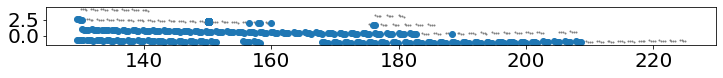

In [12]:
fig = plt.figure(figsize=(12,4))
ax = plt.subplot(111, aspect='equal')
plt.scatter ( 
    oiii_pointings['RA'],
    oiii_pointings['dec'],
    s=1,
    color='grey',
)    
plt.scatter ( 
    oiii_pointings.reindex(f2021b_pointings.query('is_queued').index)['RA'],
    oiii_pointings.reindex(f2021b_pointings.query('is_queued').index)['dec']
)    

In [13]:
prior_pointings.is_queued.sum()

251

In [14]:
prior_pointings.loc[f2021b_pointings.index,'is_queued'] = f2021b_pointings['is_queued']

In [15]:
prior_pointings.is_queued.sum()

582

In [16]:
(508 -251)/len(datelist_2021b_n536) * 15/10
# \\ make sure that this number is ~consistent with the pace of Halpha observations
# \\ we achieved in S2021A, which was about 24 pointings per night

24.09375

# Predict S2022

In [17]:
import re

In [18]:
get_catalog_objects = lambda x: x['object'].str.extract(r'(.*?(?=_))')[0]

In [19]:
halpha_s2022a = pd.read_csv('../pointings/gama_2022A.csv', index_col='object.1')
halpha_s2022a['seqid'] = 'S2022A' # \\ update date


# \\ prioritize objects at high declination
is_high = (halpha_s2022a['dec'] > 1.5)
is_early = (halpha_s2022a['RA'] < 160.)
is_late = (halpha_s2022a['RA'] > 210.)

halpha_s2022a['priority_name'] = 'GAMA'
halpha_s2022a.loc[is_high&~is_early, 'priority_name'] = 'GAMAhigh'
halpha_s2022a.loc[is_early, 'priority_name'] = 'GAMAearly'
halpha_s2022a.loc[is_late, 'priority_name'] = 'GAMAlate'

oiii_s2022a = halpha_s2022a.copy()
oiii_s2022a['filter'] = 'N540'
oiii_s2022a['object'] = [ xo.replace('N708','N540') for xo in oiii_s2022a['object'] ]
oiii_s2022a.index = oiii_s2022a['object']
oiii_s2022a['expTime'] = 900.

halpha_cosmos = halpha_pointings.loc[get_catalog_objects(halpha_pointings)=='COSMOS'].copy()
halpha_cosmos['priority_name'] = 'COSMOS'
halpha_s2022a = pd.concat([halpha_s2022a, halpha_cosmos], sort=False)                                   

oiii_cosmos = oiii_pointings.loc[get_catalog_objects(oiii_pointings)=='COSMOS'].copy()
oiii_cosmos['priority_name'] = 'COSMOS'
oiii_s2022a = pd.concat([oiii_s2022a, oiii_cosmos], sort=False)   

# how many more hours do we need in each field/filter?

In [274]:
(211. + 186.)/2.

198.5

In [275]:
in_gama = lambda x, minra, maxra: (x['RA']>=minra)&(x['RA']<maxra)
exptime_d = {'N708':10*60., 'N540':15.*60.}
tag_d = {'N708':'grey or dark', 'N540': 'dark'}
fields = ['G09','G12','G15']
ras = {'G09':(129.,157.5), 'G12':(157.5,198.5), 'G15':(198.5,227.)}
ft = 0.
fp = 0
tp = 0
tt = 0.
for field in fields:
    for fname,pointings in zip(['N708','N540'], [halpha_s2022a,oiii_s2022a]):
        in_field = in_gama (pointings, *ras[field])
        total_pointings = in_field.sum()
        plog = prior_pointings.reindex(in_field.loc[in_field].index)['is_queued']
        plog.loc[plog.isna()] = False
        observed_pointings = plog.sum()
        assert plog.shape[0] == total_pointings
        pointings_remaining = total_pointings - observed_pointings
        time_remaining = pointings_remaining * exptime_d[fname] / 3600.
        time_done = observed_pointings * exptime_d[fname] / 3600.
        tag = tag_d[fname]
        print(f'In {field} we have {time_remaining:.1f} hrs remaining ({pointings_remaining} pointings) in {fname} [{tag}]')
        print (f'({time_done:.2f} hrs observed)')
        ft += time_done
        tt += total_pointings* exptime_d[fname] / 3600.
        fp += observed_pointings
        tp += total_pointings 
assert halpha_s2022a.shape[0] + oiii_s2022a.shape[0] == tp

In G09 we have 15.7 hrs remaining (94 pointings) in N708 [grey or dark]
(36.67 hrs observed)
In G09 we have 35.0 hrs remaining (140 pointings) in N540 [dark]
(43.50 hrs observed)
In G12 we have 45.3 hrs remaining (272 pointings) in N708 [grey or dark]
(5.17 hrs observed)
In G12 we have 42.5 hrs remaining (170 pointings) in N540 [dark]
(33.25 hrs observed)
In G15 we have 21.2 hrs remaining (127 pointings) in N708 [grey or dark]
(0.00 hrs observed)
In G15 we have 25.8 hrs remaining (103 pointings) in N540 [dark]
(6.00 hrs observed)


In [276]:
ncosmos = (halpha_s2022a['priority_name'] == 'COSMOS').sum()

In [277]:
total_area = (tp - ncosmos*2)/2. / 4. * 3. # (total pointings - COSMOS pointings)/Nfilters /Npointingsperfov * FOV

### Predict OIII

* 2/9-2/13 - second half -- OIII
* 3/1-3/14 - second half -- OIII 1-7, Ha 7-14
* 3/29-3/31, 4/1 - full night -- 29/30 Ha, 31/1 OIII

In [333]:
dates = [ (2022,2,1) ]
dates += [ (2022,2,idx) for idx in range(3,11) ]
dates += [ (2022,2,28) ]
dates += [ (2022,3,idx) for idx in range(1,10) ]
dates = np.asarray(dates)


filters =  [ 'N708' for idx in range(2,11) ]
filters += [ 'N540' for idx in range(0,10) ]
filters = np.asarray(filters)

slots = [ 2, ] * len(dates)
slots = np.asarray(slots)

In [334]:
def night_info ( date, slot ):
    year, month, day = date        
    night_start, night_end = ctio.get_sunriseset ( year, month, day )
    if slot == 0:
        print('[predict] night slot: Full night')
        obs_start = night_start
        obs_end = night_end
    elif slot == 1:
        print('[predict] night slot: First half')
        obs_start = night_start
        obs_end = obs_start + 0.5*(night_end-obs_start)
    else:
        print('[predict] night slot: Second half')
        obs_start = night_start + 0.5*(night_end-night_start)
        obs_end = night_end 

    print(f"obsStart: {obs_start.astimezone(ctio.timezone).strftime(fmt)} Santiago")
    print(f"          {obs_start.astimezone(et).strftime(fmt)} ET")
    print(f"          {obs_start.strftime(fmt)} UTC")
    print(f"obsEnd:   {obs_end.astimezone(ctio.timezone).strftime(fmt)} Santiago")
    print(f"          {obs_end.astimezone(et).strftime(fmt)} ET")
    print(f"          {obs_end.strftime(fmt)} UTC")
    moon_cillum, moon_altreport = ctio.track_moon ( obs_start, obs_end)
    print(f'Moon illumination is: {moon_cillum:.2f}')
    print(f'Moon max altitude during observation is: {moon_altreport:.2f}') 
    return obs_start, obs_end
    

def predict_next ( pointings, datelist, nightslot_l, priorities, is_queued, **kwargs ):
    ocat = observe.ObsCatalog(comment='--', proposer='Leathaud', 
                              propid='2020B-0288', seqid='S2022A')

    for ix,date in enumerate(datelist):
        obs_start, obs_end = night_info (datelist[ix], nightslot_l[ix])
        is_queued = ocat.plan_night ( obs_start, ctio, 
                                     catalog=pointings, 
                                     obs_end=obs_end,
                                     is_queued=is_queued.copy(),
                                     save=False,
                                     maxairmass=1.6, 
                                     object_priority=priorities, **kwargs )
    return is_queued


#### See output

In [335]:
catalog_objects = oiii_s2022a['object'].str.extract(r'(.*(?=_))')[0]

In [336]:
# prior_s2022a.reindex(oiii_s2022a.index)
is_queued = prior_pointings.reindex(oiii_s2022a.index)
is_queued.loc[is_queued['is_queued'].isna(), 'is_queued'] = False
oiii_predictions = predict_next ( oiii_s2022a, 
                                  dates[filters=='N540'], slots[filters=='N540'],
                                  {'COSMOS':0,'GAMA':3, 'GAMAhigh':2, 'GAMAearly':1, 'GAMAlate':3},
                                  is_queued, pad_last_hour=False )

[predict] night slot: Second half
obsStart: 2022/03/01 01:56 AM Santiago
          2022/02/28 11:56 PM ET
          2022/03/01 04:56 AM UTC
obsEnd:   2022/03/01 06:31 AM Santiago
          2022/03/01 04:31 AM ET
          2022/03/01 09:31 AM UTC
Moon illumination is: 0.03
Moon max altitude during observation is: 2.09
Minimum airmass available: 1.1432708184397162
(240s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1441390915921348

==> 20220301_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1579109939764651

==> 20220301_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1595653361600233

==> 20220301_07, 3600.0s available
0.0s filled by priority=0.0 objects
900.0s 

0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.15833687401455

==> 20220306_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1479681750822006

==> 20220306_07, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
Minimum airmass available: 1.1461249233013175

==> 20220306_08, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
3600.0s filled by priority=3.0 objects
Minimum airmass available: 1.184565283239794

==> 20220306_09, 2099.9999999999654s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
1800.0s filled by priority=3.0 objects
[pr

In [337]:
new_obs = ~oiii_predictions['qstamp'].isna()
assert not is_queued.loc[new_obs, 'is_queued'].any() # \\ make sure no pointings have been re-queued

In [338]:
total_time = (slots[filters=='N540']>0).sum()*.5 + (slots[filters=='N540']==0).sum() # in nights

In [339]:
# we did about 24 exposures per half night in Halpha; 48 exposures per night
new_obs.sum() / total_time   # exposures / night 

36.0

In [340]:
ll = pd.Series(index=oiii_predictions.index)
for idx in ll.index:
    qs = oiii_predictions.loc[idx]
    if not isinstance(qs['qstamp'],str):
        ll.loc[idx] = False
    elif '20220601_' in qs['qstamp']:
        ll.loc[idx] = True
    else:
        ll.loc[idx] = False
print(ll.sum())

0


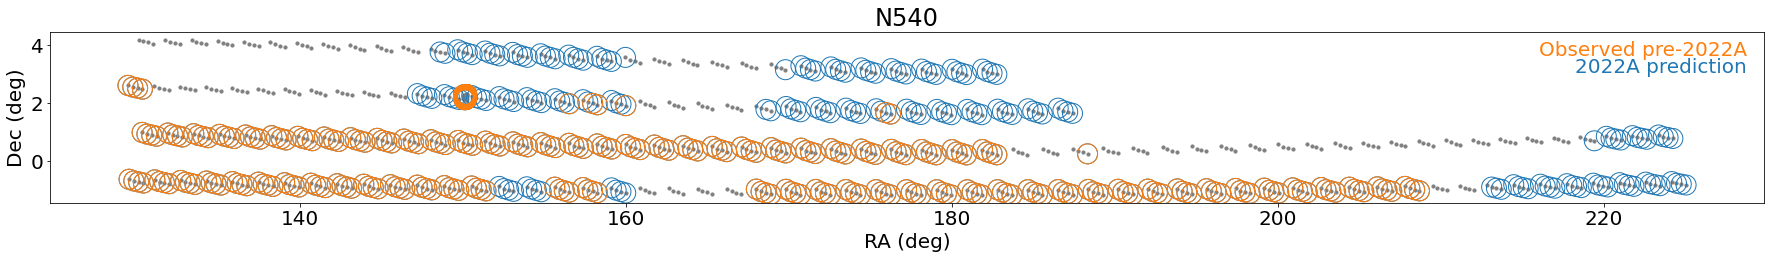

In [341]:
fig = plt.figure(figsize=(25,4))
ax = plt.subplot(111)# aspect='equal')
plt.scatter ( 
    oiii_s2022a['RA'],
    oiii_s2022a['dec'],
    s=10,
    color='grey',
)    

plt.scatter ( 
    oiii_s2022a.reindex(oiii_predictions.query('is_queued').index)['RA'],
    oiii_s2022a.reindex(oiii_predictions.query('is_queued').index)['dec'],
    s=400, ec='C0', fc='None', lw=1
) 

plt.scatter ( 
    oiii_s2022a.reindex(prior_pointings.query('is_queued').index)['RA'],
    oiii_s2022a.reindex(prior_pointings.query('is_queued').index)['dec'],
    s=400, ec='C1', fc='None'
)

ax.text ( 0.99, .95, 'Observed pre-2022A', ha='right', va='top', color='C1', transform=ax.transAxes )
ax.text ( 0.99, .85, '2022A prediction', ha='right', va='top', color='C0', transform=ax.transAxes )
ax.set_xlabel ('RA (deg)')
ax.set_ylabel ('Dec (deg)')
ax.set_title('N540')

#plt.scatter ( oiii_pointings.loc[test, 'RA'], oiii_pointings.loc[test,'dec'], color='r', s=300 )
plt.tight_layout()
plt.savefig('../../figures/2022Awjune_N540predictions.png')

### Predict H$\alpha$

#### See output

In [342]:
# prior_pointings.reindex(halpha_s2022a.index)
is_queued = prior_pointings.reindex(halpha_s2022a.index)
is_queued.loc[is_queued['is_queued'].isna(), 'is_queued'] = False
halpha_predictions = predict_next ( halpha_s2022a, 
                                  dates[filters=='N708'], slots[filters=='N708'],
                                  {'COSMOS':0,'GAMA':3, 'GAMAhigh':2, 'GAMAearly':1, 'GAMAlate':4},
                                  is_queued, pad_last_hour=False)

[predict] night slot: Second half
obsStart: 2022/02/02 01:57 AM Santiago
          2022/02/01 11:57 PM ET
          2022/02/02 04:57 AM UTC
obsEnd:   2022/02/02 06:05 AM Santiago
          2022/02/02 04:05 AM ET
          2022/02/02 09:05 AM UTC
Moon illumination is: 0.02
Moon max altitude during observation is: 0.00
Minimum airmass available: 1.2062337130577532
(180s) Not enough time for an exposure. Skipping...
Minimum airmass available: 1.1576113265023231

==> 20220202_05, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
0.0s filled by priority=4.0 objects
Minimum airmass available: 1.1429372922322543

==> 20220202_06, 3600.0s available
0.0s filled by priority=0.0 objects
3600.0s filled by priority=1.0 objects
0.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
0.0s filled by priority=4.0 objects
Minimum airmass available: 1.1428169683071785

==> 20

0.0s filled by priority=4.0 objects
Minimum airmass available: 1.1423628844338725

==> 20220208_06, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
0.0s filled by priority=4.0 objects
Minimum airmass available: 1.1418479354316506

==> 20220208_07, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
0.0s filled by priority=4.0 objects
Minimum airmass available: 1.142314151107081

==> 20220208_08, 3600.0s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
3600.0s filled by priority=2.0 objects
0.0s filled by priority=3.0 objects
0.0s filled by priority=4.0 objects
Minimum airmass available: 1.1438528399222694

==> 20220208_09, 659.9999999999512s available
0.0s filled by priority=0.0 objects
0.0s filled by priority=1.0 objects
600.0

In [343]:
new_obs = ~halpha_predictions['qstamp'].isna()
assert not is_queued.loc[new_obs, 'is_queued'].any() # \\ make sure no pointings have been re-queued

In [344]:
halpha_predictions.query('is_queued').shape[0], new_obs.sum()

(471, 220)

In [345]:
total_time = (slots[filters=='N708']>0).sum()*.5 + (slots[filters=='N708']==0).sum() # in nights

In [346]:
# we did about 24 exposures per half night in Halpha; 48 exposures per night
new_obs.sum() / total_time  # exposures / night

48.888888888888886

In [347]:
ll = pd.Series(index=halpha_predictions.index)
for idx in ll.index:
    qs = halpha_predictions.loc[idx]
    if not isinstance(qs['qstamp'],str):
        ll.loc[idx] = False
    elif '20220310' in qs['qstamp']:
        ll.loc[idx] = True
    else:
        ll.loc[idx] = False

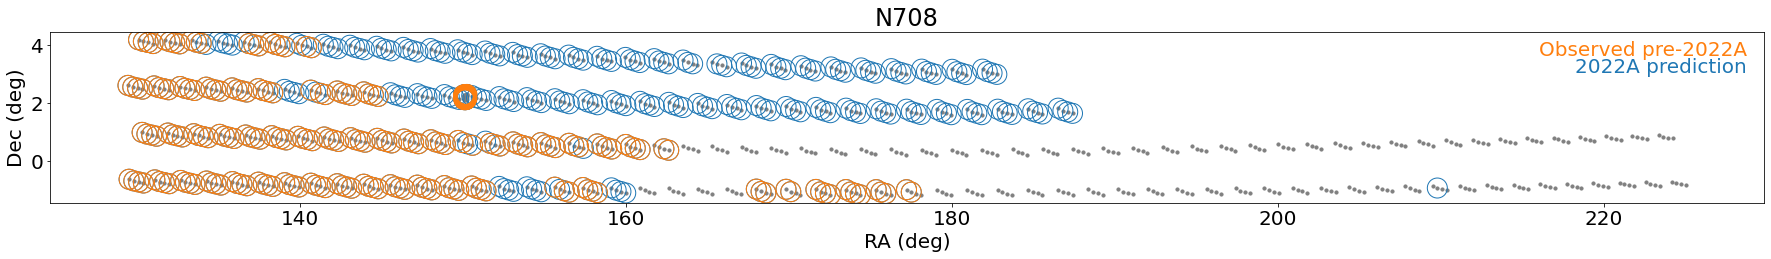

In [348]:
fig = plt.figure(figsize=(25,4))
ax = plt.subplot(111)# aspect='equal')
plt.scatter ( 
    halpha_s2022a['RA'],
    halpha_s2022a['dec'],
    s=10,
    color='grey',
)    
plt.scatter ( 
    halpha_s2022a.reindex(halpha_predictions.query('is_queued').index)['RA'],
    halpha_s2022a.reindex(halpha_predictions.query('is_queued').index)['dec'],
    s=400, ec='C0', fc='None', lw=1
) 
plt.scatter ( 
    halpha_s2022a.reindex(prior_pointings.query('is_queued').index)['RA'],
    halpha_s2022a.reindex(prior_pointings.query('is_queued').index)['dec'],
    s=400, ec='C1', fc='None'
)

ax.text ( 0.99, .95, 'Observed pre-2022A', ha='right', va='top', color='C1', transform=ax.transAxes )
ax.text ( 0.99, .85, '2022A prediction', ha='right', va='top', color='C0', transform=ax.transAxes )
ax.set_xlabel ('RA (deg)')
ax.set_ylabel ('Dec (deg)')

ax.set_title('N708')
plt.tight_layout()
plt.savefig('../../figures/2022Awjune_N708predictions.png')

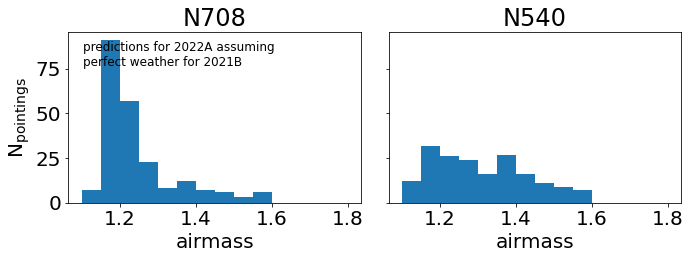

In [349]:
fig, axarr = plt.subplots(1,2,figsize=(10,4), sharey=True)
bins = np.linspace(1.1,1.8,15)
axarr[0].hist ( halpha_predictions['airmass'].dropna(), bins=bins )
axarr[1].hist ( oiii_predictions['airmass'].dropna(), bins=bins )
for ax in axarr:
    ax.set_xlabel('airmass')
axarr[0].set_ylabel(r'$\rm N_{pointings}$')
plt.tight_layout ()

axarr[0].set_title(r'N708')
axarr[1].set_title('N540')
axarr[0].text(.05,.95,'''predictions for 2022A assuming
perfect weather for 2021B''', ha='left',va='top',
             transform=axarr[0].transAxes, fontsize=12)
plt.tight_layout ()
plt.savefig('../../figures/2022Awjune_airmass.png')